In [22]:
# Set Up
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from PIL import Image

In [23]:
# Helper Functions for displaying image and scaling

def scale_img(img, scale_percent):
    #print("\nscale_img()")
    #print(img.shape)
    
    # Scaled Image Dimensions
    width  = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    # resize image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #print(img.shape)
    return img

# show grayscale image
def show_grayscale( my_image ):
    plt.figure(figsize = (10,10))
    plt.imshow(my_image, cmap = plt.get_cmap(name = 'gray'))
    plt.show()

# horizontally concatenate 2 images
def concat_horiz(img1, img2):
    vis = np.concatenate((img1, img2), axis=1)
    show_grayscale(vis)
    return vis

In [24]:
# Filter image
# Remember -> OpenCV stores things in BGR order
def threshold_BGR(image):
    
    # define range of blue color in HSV
    lowerBound = np.array([50,50,110])
    upperBound = np.array([255,255,200])

    # Threshold the HSV imag
    mask = cv2.inRange(image, lowerBound, upperBound)
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(image,image, mask= mask)
    return res

In [25]:
# Cool Medium article on K means
# https://towardsdatascience.com/introduction-to-image-segmentation-with-k-means-clustering-83fd0a9e2fc3

# Opencv guide to changing colorspaces
# https://docs.opencv.org/trunk/df/d9d/tutorial_py_colorspaces.html
    
# Conducts Image Segmentation using K Means Clustering, shows result
# Input: Image File, Number of Clusters Desired, Number of attemps, print debug bool

def image_seg_Kmeans( file, K=3, attempts=10,print=False):
    # read image
    img = cv2.imread(file)

    img  = scale_img(img, 25)
    
    # convert to RGB
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #rgb = threshold_BGR(img)
    
    plt.imshow(rgb)
    plt.show()

    # convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    plt.imshow(hsv)
    plt.show()
    
    # [10 255 255]
    # define range of red color in HSV
    lower_red = np.array([0 ,255 ,255])
    upper_red = np.array([10 ,255 ,255])
 
    # Threshold the HSV image to get only red colors
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    plt.imshow(mask)
    plt.show()
    
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(hsv, hsv, mask= mask)

    plt.imshow(res)
    plt.show()
    
    # vector Z
    Z = res.reshape((-1,3))

    # convert to np.float32
    Z = np.float32(Z)
    if(print):
        print(Z.shape)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, attempts, 0.2)

    # number of clusters
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)

    # flatten labels array
    res2 = center[label.flatten()]\

    # reshape back to original image dimension
    res3 = res2.reshape((img.shape))

    plt.imshow(res3)
    plt.show()

In [26]:
image_seg_Kmeans('t1.JPG',K=3)

AttributeError: 'NoneType' object has no attribute 'shape'

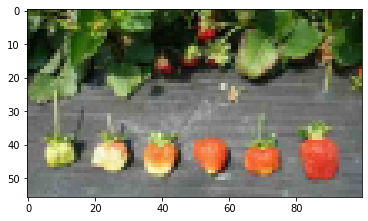

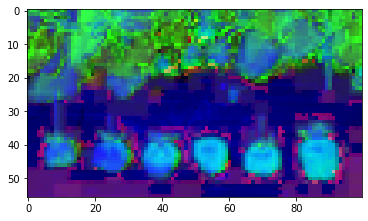

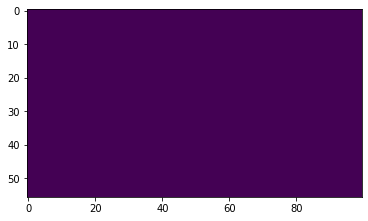

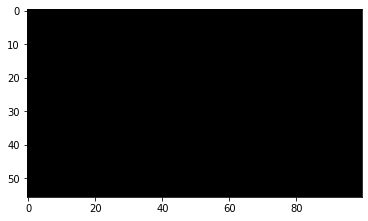

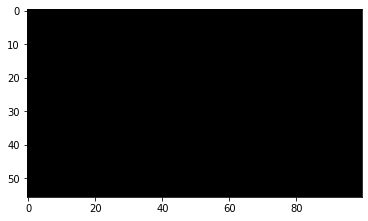

In [28]:
image_seg_Kmeans('t2.jpg',K=4)

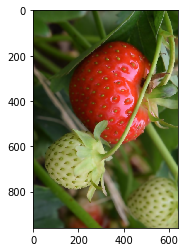

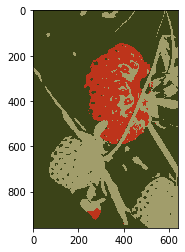

In [60]:
image_seg_Kmeans('t3.jpg')

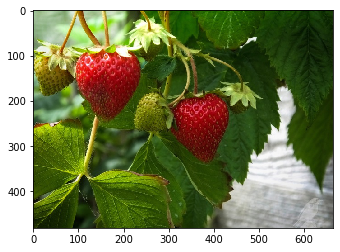

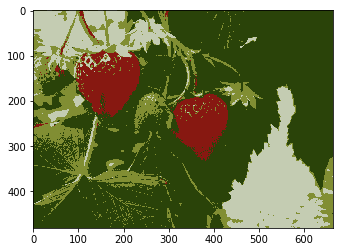

In [49]:
image_seg_Kmeans('t4.jpg',K=4)

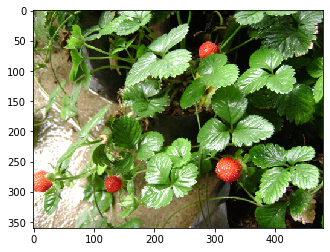

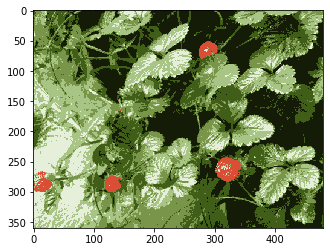

In [50]:
image_seg_Kmeans('t5.jpg',K=6)

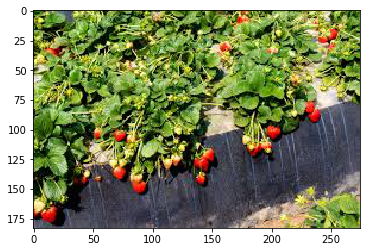

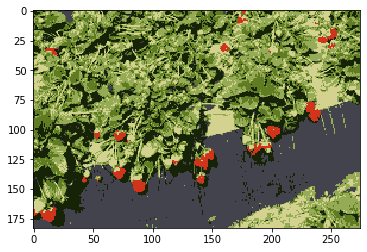

In [51]:
image_seg_Kmeans('t6.jpg',K=6)

In [26]:
red = np.uint8([[[255,0,0 ]]])
hsv_green = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)
print( hsv_green )

[[[120 255 255]]]
